In this notebook, we compare Alexandria, Baltimore, DC, and Richmond to the rest of the cities in the 500 Cities dataset. We find the interquartile range for each question and identify if any of our cities lie outside that range. Then, we compare our cities to the rest of the dataset based on our health question of interest, mental health.

The first step is to import sodapy. The CDC's 500 Cities API is made publically avaialable using sodapy, a package created by the Seattle-based software company Socrata. If sodapy, or any other package used in this notebook has not been downloaded to your machine, they can be installed by running "pip install {package}" in a cell or the command line.

In [1]:
from sodapy import Socrata
import pandas as pd 

client = Socrata("chronicdata.cdc.gov", None)
results = client.get("dxpw-cm5u", limit=30000) # Source: https://dev.socrata.com/foundry/chronicdata.cdc.gov/dxpw-cm5u
results_df = pd.DataFrame.from_records(results)

results_df.head()

,access2_adj95ci,access2_adjprev,access2_crude95ci,access2_crudeprev,arthritis_adj95ci,arthritis_adjprev,arthritis_crude95ci,arthritis_crudeprev,binge_adj95ci,binge_adjprev,...,sleep_crudeprev,stateabbr,stroke_adj95ci,stroke_adjprev,stroke_crude95ci,stroke_crudeprev,teethlost_adj95ci,teethlost_adjprev,teethlost_crude95ci,teethlost_crudeprev
0,"( 7.2, 8.2)",7.7,"( 7.0, 8.0)",7.5,"(17.2, 17.7)",17.4,"(16.6, 17.2)",16.9,"(21.2, 21.7)",21.5,...,33.9,CA,"( 2.0, 2.1)",2,"( 1.9, 2.0)",1.9,"( 5.7, 7.9)",6.8,"( 5.7, 8.0)",6.8
1,"(20.4, 21.5)",20.9,"(19.1, 20.2)",19.6,"(23.1, 23.5)",23.3,"(30.3, 30.9)",30.6,"(20.5, 20.8)",20.6,...,37.7,FL,"( 3.2, 3.3)",3.2,"( 4.4, 4.7)",4.5,"(16.7, 19.4)",18,"(16.9, 19.8)",18.3
2,"( 6.8, 7.3)",7.1,"( 7.3, 8.1)",7.7,"(17.8, 18.1)",18,"(15.0, 15.3)",15.1,"(18.6, 18.9)",18.8,...,32.2,CA,"( 2.2, 2.3)",2.3,"( 1.8, 1.9)",1.9,"( 6.3, 7.4)",6.8,"( 6.2, 7.2)",6.7
3,"(12.1, 13.3)",12.7,"(11.8, 12.8)",12.3,"(19.1, 19.5)",19.3,"(20.5, 21.0)",20.7,"(19.7, 20.1)",19.9,...,32.7,CA,"( 2.5, 2.7)",2.6,"( 2.7, 2.9)",2.8,"(10.0, 12.3)",11.2,"(10.0, 12.5)",11.2
4,"(22.6, 24.1)",23.3,"(22.1, 23.5)",22.8,"(20.6, 21.0)",20.8,"(22.5, 23.1)",22.8,"(17.1, 17.3)",17.2,...,38.1,FL,"( 3.2, 3.4)",3.3,"( 3.5, 3.8)",3.7,"(14.2, 17.7)",15.8,"(14.3, 18.5)",16.2


In [2]:
# Since the data has been downloaded with ugly column names, we have to manually rename each column
results_df = pd.DataFrame({
    'City': results_df['placename'],
    'State': results_df['stateabbr'],
    'Location': '', # This column is created to combine the City and State columns
    'Population': results_df['population2010'],
    'Geolocation': results_df['geolocation'],
    'Annual Checkup': results_df['checkup_crudeprev'],
    'Arthritis': results_df['arthritis_crudeprev'],
    'Binge Drinking': results_df['binge_crudeprev'],
    'Cancer (except skin)': results_df['cancer_crudeprev'],
    'Cholesterol Screening': results_df['cholscreen_crudeprev'],
    'Chronic Kidney Disease': results_df['kidney_crudeprev'],
    'Colorectal Cancer Screening': results_df['colon_screen_crudeprev'],
    'COPD': results_df['copd_crudeprev'],
    'Core preventive services for older men': results_df['corem_crudeprev'],
    'Core preventive services for older women': results_df['corew_crudeprev'],
    'Coronary Heart Disease': results_df['chd_crudeprev'],
    'Current Asthma': results_df['casthma_crudeprev'],
    'Current Smoking': results_df['csmoking_crudeprev'],
    'Dental Visit': results_df['dental_crudeprev'],
    'Diabetes': results_df['diabetes_crudeprev'],
    'Health Insurance': results_df['access2_crudeprev'],
    'High Blood Pressure': results_df['bphigh_crudeprev'],
    'High Cholesterol': results_df['highchol_crudeprev'],
    'Mammography': results_df['mammouse_crudeprev'],
    'Mental Health': results_df['mhlth_crudeprev'],
    'Obesity': results_df['obesity_crudeprev'],
    'Pap Smear Test': results_df['paptest_crudeprev'],
    'Physical Health': results_df['phlth_crudeprev'],
    'Physical Inactivity': results_df['lpa_crudeprev'],
    'Sleep <7 hours': results_df['sleep_crudeprev'],
    'Stroke': results_df['stroke_crudeprev'],
    'Taking BP Medication': results_df['bpmed_crudeprev'],
    'Teeth Loss': results_df['teethlost_crudeprev']
        })

results_df['Location'] = results_df.apply(lambda x: x['City'] + ', ' + x['State'], axis=1) # Populated the location column

results_df.head()

,City,State,Location,Population,Geolocation,Annual Checkup,Arthritis,Binge Drinking,Cancer (except skin),Cholesterol Screening,...,Mammography,Mental Health,Obesity,Pap Smear Test,Physical Health,Physical Inactivity,Sleep <7 hours,Stroke,Taking BP Medication,Teeth Loss
0,Folsom,CA,"Folsom, CA",72203,"(38.67504943280, -121.147605753)",64.7,16.9,21.8,5.8,78.1,...,80.4,9.9,23.8,84.3,8.9,14.3,33.9,1.9,64.8,6.8
1,Largo,FL,"Largo, FL",77648,"(27.90909077340, -82.7714203383)",77.5,30.6,16.9,9,80.2,...,75.7,13.1,28.3,77.1,15.4,31,37.7,4.5,81,18.3
2,Berkeley,CA,"Berkeley, CA",112580,"(37.87256787650, -122.274907975)",64.7,15.1,19.6,4.9,70,...,81.5,10.9,18.5,83.2,8.2,14.2,32.2,1.9,68.2,6.7
3,Napa,CA,"Napa, CA",76915,"(38.29804246490, -122.301093331)",63.8,20.7,19.2,6.5,75.4,...,76.7,12,24,83.9,12,19.8,32.7,2.8,70.2,11.2
4,Sunrise,FL,"Sunrise, FL",84439,"(26.15468783030, -80.2998411020)",77.7,22.8,16.3,6.5,78.7,...,82.5,12.7,28.1,81.3,13.3,29.5,38.1,3.7,76.7,16.2


Now that the data has legible column names, we have to convert each health question column to numbers because Socrata downloads them as strings.

In [3]:
questions = [] # We create a list of question column names to be used in the cell below this one
for i in results_df.columns.tolist():
    try: # If it's a question column, convert it
        results_df[i] = pd.to_numeric(results_df[i])
        questions.append(i)
    except ValueError: # If the column isn't a number, don't try to convert the type
        pass

summary = results_df.describe()
summary # Now we have some basic summary statistics for our data

,Population,Annual Checkup,Arthritis,Binge Drinking,Cancer (except skin),Cholesterol Screening,Chronic Kidney Disease,Colorectal Cancer Screening,COPD,Core preventive services for older men,...,Mammography,Mental Health,Obesity,Pap Smear Test,Physical Health,Physical Inactivity,Sleep <7 hours,Stroke,Taking BP Medication,Teeth Loss
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,453.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.060416e+05,68.473600,22.058800,17.656200,5.632400,72.780400,2.820000,63.662000,6.106400,33.906400,...,78.847200,12.833200,29.247600,82.882781,12.269600,23.992000,35.451200,2.983800,72.545200,14.491800
std,4.574810e+05,5.575643,4.392143,2.684346,0.984301,5.215898,0.507775,5.834604,1.618071,5.853081,...,3.032861,2.061543,5.753198,2.316211,2.453576,6.468535,4.276531,0.803298,4.534128,4.967134
min,4.241700e+04,51.200000,10.700000,9.100000,2.800000,45.700000,1.600000,42.200000,3.100000,18.900000,...,67.400000,7.900000,14.900000,73.000000,7.100000,10.100000,24.200000,1.300000,55.400000,4.900000
25%,8.159000e+04,64.300000,18.675000,16.000000,4.900000,69.600000,2.475000,60.100000,4.900000,30.250000,...,76.900000,11.400000,25.100000,81.500000,10.500000,18.800000,32.500000,2.400000,69.000000,10.800000
50%,1.061060e+05,67.900000,21.650000,17.550000,5.600000,72.700000,2.800000,64.200000,5.900000,33.900000,...,79.200000,12.900000,29.200000,83.100000,12.300000,23.850000,35.150000,2.900000,73.000000,14.300000
75%,1.811278e+05,72.700000,25.100000,19.200000,6.200000,76.425000,3.100000,67.500000,7.100000,37.625000,...,80.925000,14.300000,33.200000,84.600000,13.925000,28.200000,38.100000,3.400000,76.200000,17.700000
max,8.175133e+06,82.000000,35.200000,27.400000,9.000000,84.500000,4.800000,76.600000,11.700000,53.000000,...,85.500000,18.400000,49.100000,88.400000,19.900000,46.800000,49.800000,6.700000,83.100000,31.700000


In [4]:
# Now, we want to identify the questions where our cities are in the top or bottom 25%
cities = ['Baltimore, MD', 'Washington, DC', 'Richmond, VA', 'Alexandria, VA']
quartile_df = pd.DataFrame(columns=['City','Question','Value','Quartile'])
for c in cities:
    for q in questions:
        row = {'City': c, 'Question': q, 'Value': 0, 'Quartile': ''}
        df = results_df[results_df['Location'] == c].reset_index(drop=True)
        row['Value'] = df.loc[0,q]
        if df.loc[0,q] < summary.loc['25%',q]:
            row['Quartile'] = '<25%'
            quartile_df.loc[len(quartile_df)] = row
        elif df.loc[0,q] > summary.loc['75%',q]:
            row['Quartile'] = '>75%'
            quartile_df.loc[len(quartile_df)] = row
            
quartile_df['Question'].value_counts()

Mammography                                 4
Physical Inactivity                         3
Arthritis                                   3
Diabetes                                    3
Population                                  3
Teeth Loss                                  3
Stroke                                      3
Dental Visit                                3
Annual Checkup                              3
Sleep <7 hours                              3
Core preventive services for older women    2
High Cholesterol                            2
Current Asthma                              2
Coronary Heart Disease                      2
High Blood Pressure                         2
Chronic Kidney Disease                      2
COPD                                        2
Pap Smear Test                              2
Physical Health                             2
Cholesterol Screening                       2
Current Smoking                             2
Mental Health                     

In [5]:
# Here, we can see that DC and Alexandria have much better mental health than most cities in the dataset
quartile_df[quartile_df['Question'] == 'Mental Health']

,City,Question,Value,Quartile
29,"Washington, DC",Mental Health,11,<25%
56,"Alexandria, VA",Mental Health,10,<25%


In [6]:
# Now, for curiosity's sake, lets look at which cities have the worst mental health
results_df.drop(columns=['City','State','Population','Geolocation'],inplace=True)
results_df = results_df.sort_values('Mental Health', ascending=False).reset_index(drop=True)
results_df.head(10)

,Location,Annual Checkup,Arthritis,Binge Drinking,Cancer (except skin),Cholesterol Screening,Chronic Kidney Disease,Colorectal Cancer Screening,COPD,Core preventive services for older men,...,Mammography,Mental Health,Obesity,Pap Smear Test,Physical Health,Physical Inactivity,Sleep <7 hours,Stroke,Taking BP Medication,Teeth Loss
0,"Flint, MI",75.1,34.5,15.2,5.8,69.3,4.4,57.4,11.7,22.9,...,83.4,18.4,45.0,84.1,19.9,35.3,48.7,5.7,76.2,25.4
1,"Reading, PA",66.9,28.2,15.6,4.9,62.5,3.9,51.1,9.0,27.6,...,75.9,18.3,41.2,79.5,18.7,38.6,45.3,4.4,74.4,31.6
2,"Camden, NJ",76.4,24.7,12.7,4.0,66.1,3.8,45.2,8.6,21.1,...,79.6,18.3,42.9,84.2,19.0,46.7,49.8,4.5,74.6,28.7
3,"New Bedford, MA",78.1,31.0,15.9,7.0,74.1,3.5,66.0,10.4,30.8,...,82.5,18.3,31.6,82.9,16.9,31.3,40.3,4.2,78.3,26.7
4,"Fall River, MA",78.0,31.3,16.4,7.1,74.8,3.4,66.6,10.6,31.4,...,82.5,18.2,30.6,82.5,16.5,30.6,39.7,4.1,78.6,27.0
5,"Detroit, MI",77.2,33.7,14.8,5.8,71.7,4.7,58.5,11.3,20.8,...,83.9,18.0,47.0,85.5,19.3,35.7,49.8,6.4,78.7,25.9
6,"Dayton, OH",75.4,32.0,14.1,5.8,68.5,3.8,55.5,10.6,31.0,...,81.9,17.1,42.3,82.3,17.0,35.9,44.7,5.0,79.5,28.2
7,"Springfield, MA",78.5,27.5,16.3,5.5,71.3,3.5,59.6,8.2,27.0,...,83.3,17.1,36.2,84.3,16.5,34.5,38.9,4.0,75.8,26.0
8,"Trenton, NJ",76.7,23.9,14.4,4.6,68.4,3.5,53.9,8.5,23.0,...,79.7,17.0,38.9,84.9,17.8,42.2,45.7,4.4,74.4,26.1
9,"Canton, OH",75.4,31.4,15.7,6.5,70.9,3.7,56.3,10.5,32.8,...,76.1,16.9,40.1,82.3,17.0,35.6,42.0,4.6,79.6,23.2


Here, we write our dataframe to a csv. This csv file can be used to create visualizations with other software. On this project's visualization page, an interactive bar graph of this data can be found. This bar graph was created using D3.js and it shows the top and bottom 25 cities for every health question. For questions where Alexandria, Baltimore, DC, or Richmond are within the 25 highest, their respective bars are colored yellow and not the default black.

In [7]:
results_df.to_csv('../Data/500cities.csv', index=False)

Now that the dataframe is sorted by the percentage of the population with poor mental health, we select out our cities to see how they rank. We can see that Alexandria has the 53rd best mental health in the dataset.

In [8]:
results_df[results_df['Location'].isin(cities)]

,Location,Annual Checkup,Arthritis,Binge Drinking,Cancer (except skin),Cholesterol Screening,Chronic Kidney Disease,Colorectal Cancer Screening,COPD,Core preventive services for older men,...,Mammography,Mental Health,Obesity,Pap Smear Test,Physical Health,Physical Inactivity,Sleep <7 hours,Stroke,Taking BP Medication,Teeth Loss
155,"Baltimore, MD",76.5,26.5,16.8,5.5,75.4,3.3,64.6,7.2,34.9,...,83.9,13.9,35.3,NaN,12.3,28.6,43.0,4.2,78.3,19.6
165,"Richmond, VA",73.4,22.1,17.4,5.0,71.9,3.1,63.4,6.4,31.5,...,84.1,13.8,32.6,83.8,12.3,26.3,38.7,3.7,77.5,18.9
403,"Washington, DC",78.6,18.0,24.3,4.8,77.2,2.6,67.4,5.1,31.7,...,82.1,11.0,25.2,87.3,9.0,17.2,36.4,3.0,74.7,14.4
447,"Alexandria, VA",71.1,18.4,19.2,5.1,79.5,2.1,72.4,3.9,44.2,...,82.9,10.0,25.2,86.7,8.5,17.1,31.9,2.0,73.3,9.0


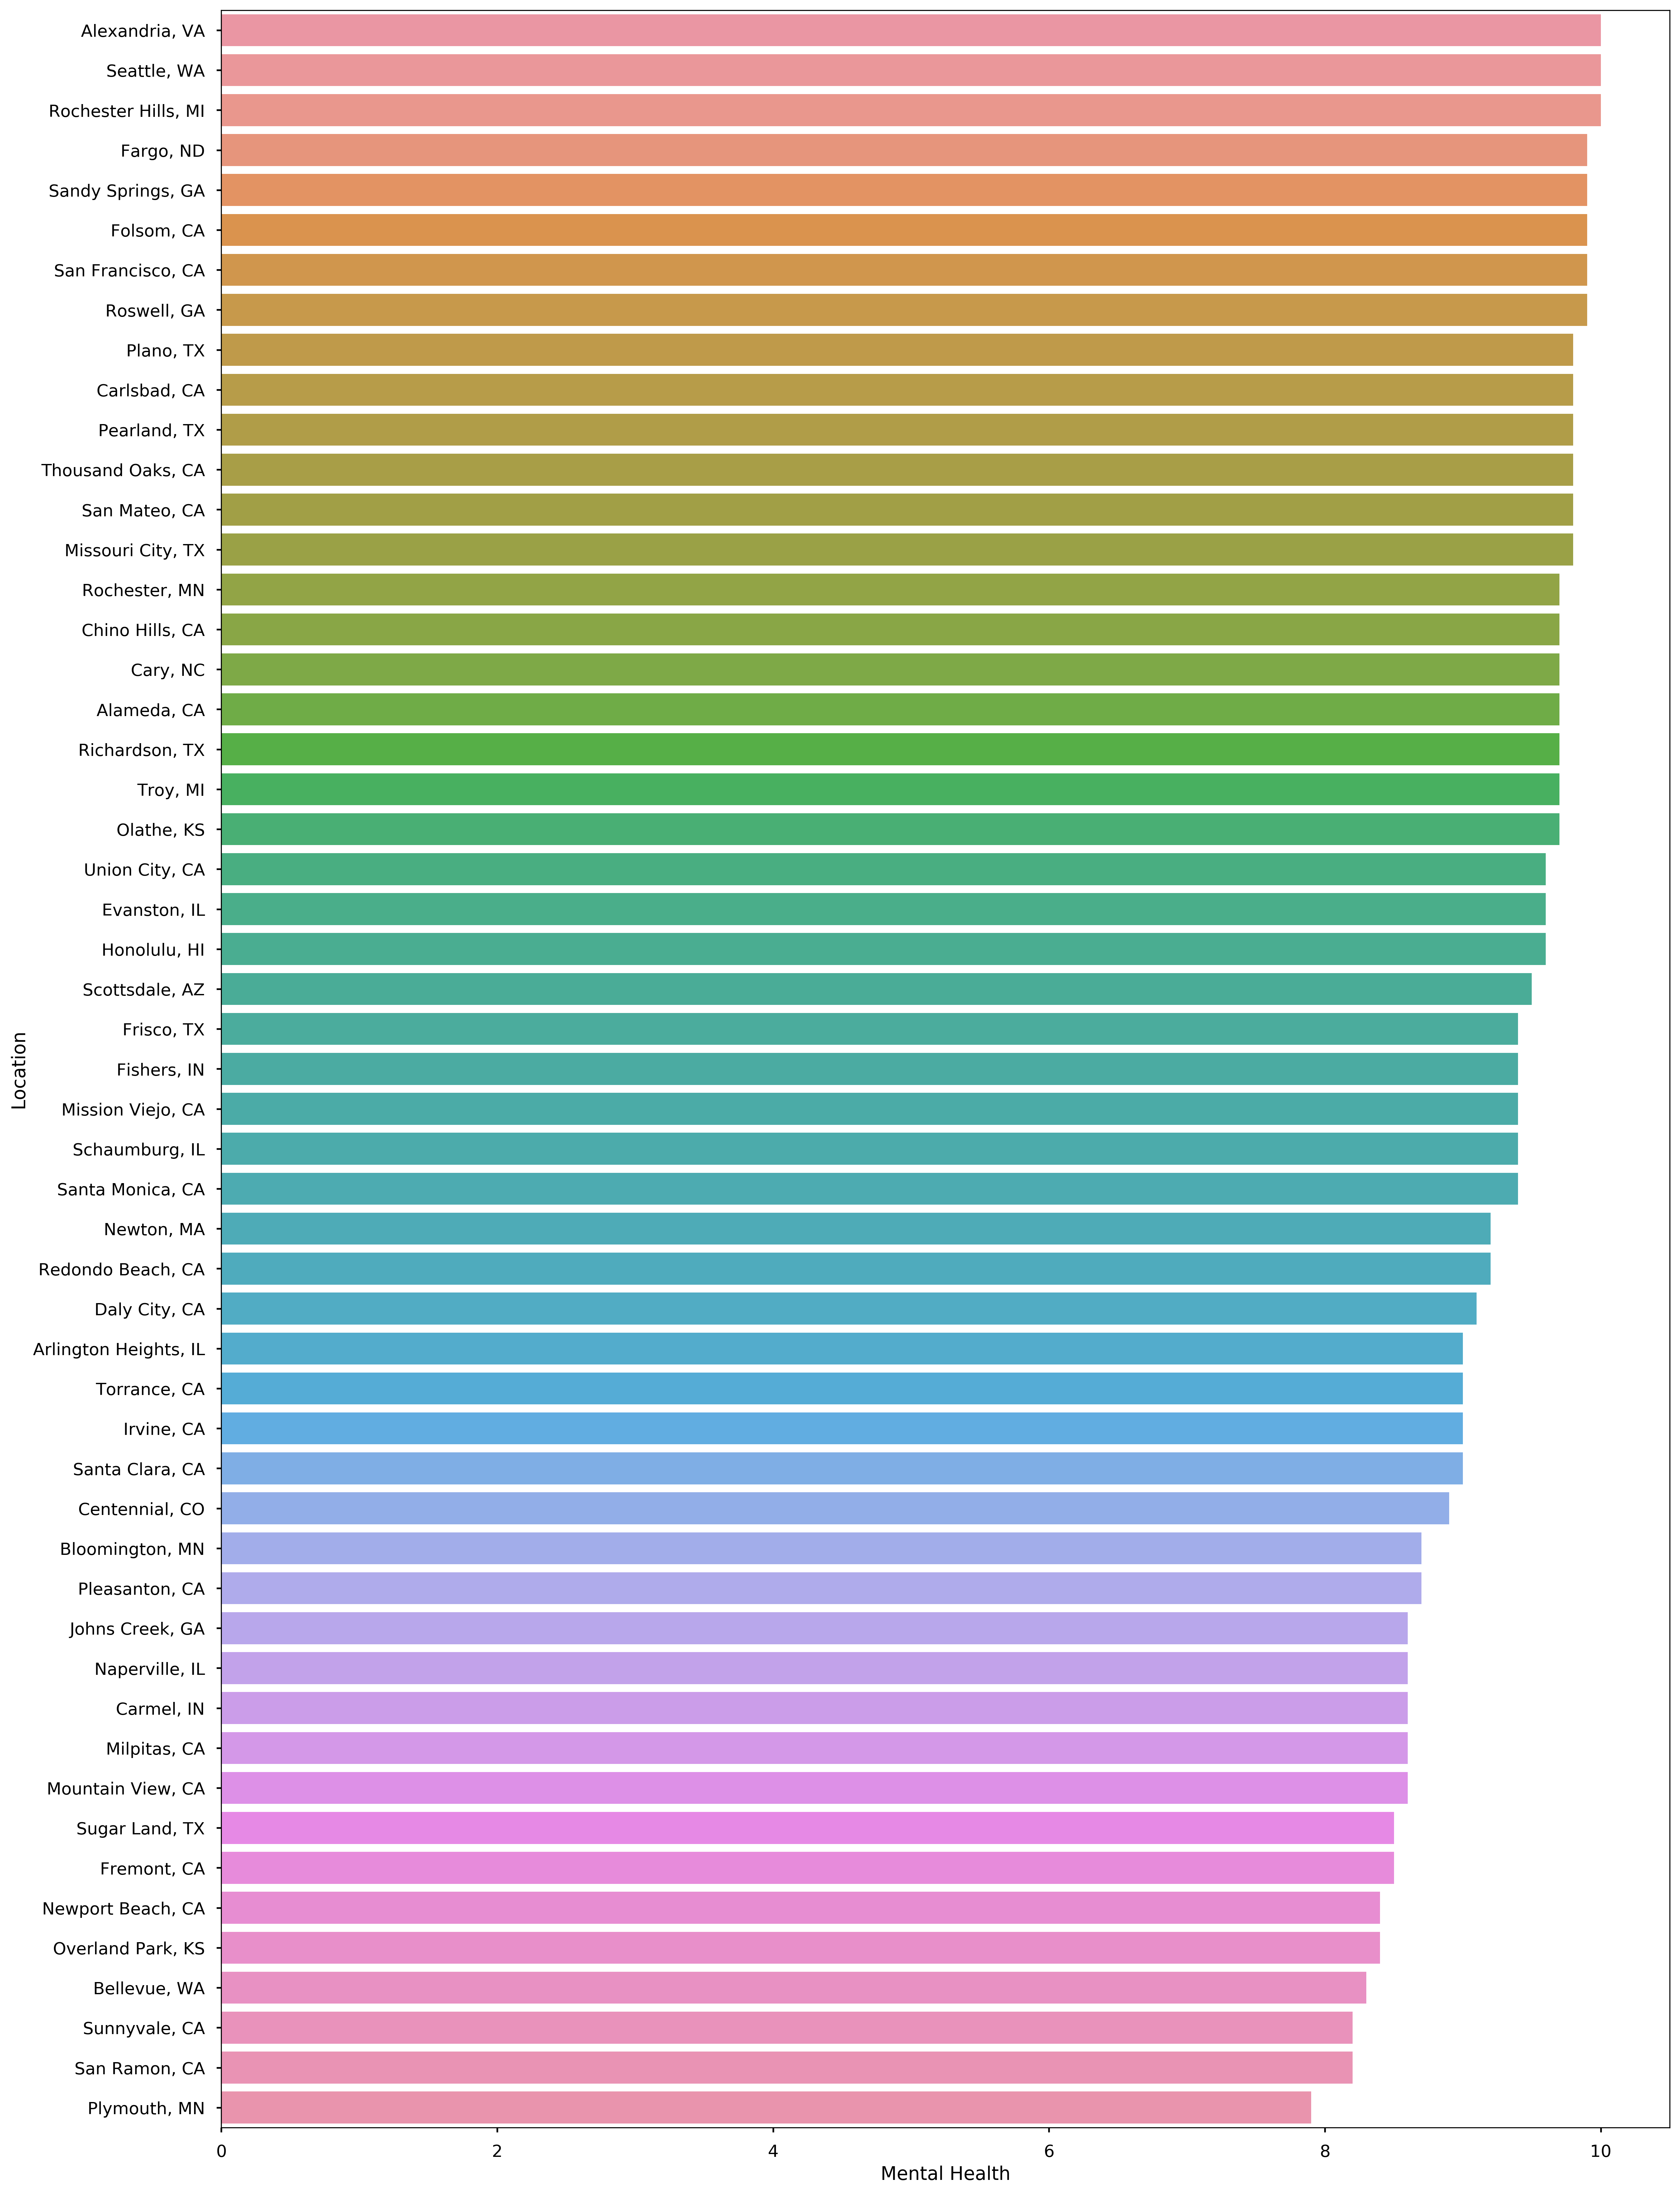

In [10]:
# Lastly, we create a bar graph that shows how Alexandria compares to other cities with great mental health
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('seaborn-talk')

plt.figure(figsize=(20,30), dpi=300)
sns.barplot(x="Mental Health", y="Location", data=results_df.tail(53))
plt.show()